<a href="https://colab.research.google.com/github/armanboyaci/notebooks/blob/master/datascience_questions/q14_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question**: Say we are given a list of several categories (for example, the strings: A, B, C, and D) and want to sample from a list of such categories according to a particular weighting scheme. Such an example would be: for 100 items total, we want to see A 20% of the time, B 15% of the time, C 35% of the time, and D 30% of the time. How do we simulate this? What if we care about an arbitrary number of categories and about memory usage?

In [73]:
import bisect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
plt.style.use("fivethirtyeight")

In [93]:
weights = pd.Series({"A": 0.20,
                     "B": 0.15,
                     "C": 0.35,
                     "D": 0.30,
                     #"E": 0.50,
                     })

In [94]:
# Normalize
weights = weights / weights.sum()
weights

,0
A,0.20
B,0.15
C,0.35
D,0.30


In [95]:
thresholds = weights.cumsum().values
thresholds

array([0.2 , 0.35, 0.7 , 1.  ])

In [96]:
N = 10_000
random_numbers = np.random.random(N)

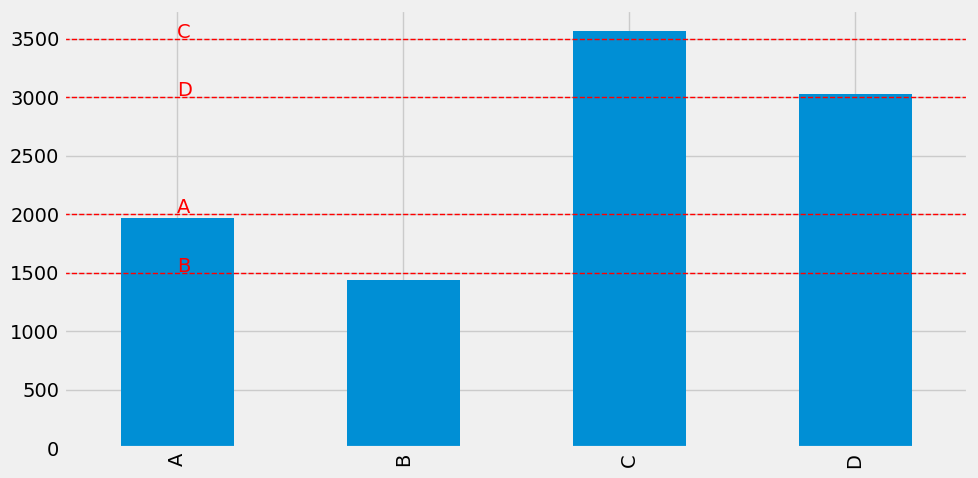

In [97]:
ax = pd.Series([weights.index[bisect.bisect_left(a=thresholds, x=x)] for x in random_numbers]).value_counts().sort_index().plot.bar(figsize=(10,5))

for w in weights.items():
  ax.axhline(w[1]*N, color="red", lw=1, ls="--")
  ax.annotate(w[0], xy=(0, w[1]*N + 10 ), color="red")

plt.tight_layout()